In [2]:
# import the most useful packages
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd

import librosa
import librosa.display
from glob import glob
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

try:
    plt.style.use('rossidata')
except:
    sns.set_style("white")
import mediapy as media
import warnings
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")


In [4]:
import tensorflow as tf
import IPython.display as ipd
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPooling1D, BatchNormalization,LSTM,Embedding,Masking,TimeDistributed,Input
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv1D,Conv2D
from keras.utils import np_utils
# from keras.utils import to_categorical

In [5]:
import sys
sys.path.append('../')
from core_software.classifier_layer.prep_training_data import mp3toMSG,add_padding
from core_software.service_layer.prediction_service import ToneClassifier

# Loading Previous Data

In [6]:
!ls ../data/ma_data

ma1_FV1_MP3.mp3  ma2_FV1_MP3.mp3  ma_MSGs.npy      ma_mfccs.npy
ma1_USER.wav     ma3_FV1_MP3.mp3  ma_encodings.csv
ma1_USER2.wav    ma4_FV1_MP3.mp3  ma_labels.npy


In [7]:
MA_MSGs=np.load('../data/ma_data/ma_MSGs.npy')
MA_labels=np.load('../data/ma_data/ma_labels.npy')

1,2,3,4

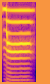
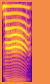
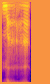
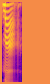

In [8]:
MSG_dict=dict(zip(MA_labels, MA_MSGs))
media.show_images(MSG_dict,columns=6,  border=True, height=100,cmap='plasma')

# User Data

not_trimmed,trimmed

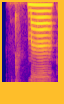
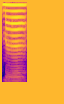

In [9]:
test_file='../data/ma_data/ma1_USER2.wav'


def full_featurization(test_file,trimming=True):
    msg_audio_file=mp3toMSG(test_file,trimming=trimming)
    max_dims=(100, 60)
    fully_featurized = add_padding([msg_audio_file], bonus_padding=2,maxes=max_dims)[0]
    fully_featurized=np.expand_dims(fully_featurized, -1)

    return fully_featurized


trim_dict={'not_trimmed':full_featurization(test_file,trimming=False),
          'trimmed':full_featurization(test_file,trimming=True)}
media.show_images(trim_dict,height=200,cmap='plasma')

In [10]:
classifier=ToneClassifier()
prediction=classifier.predict(test_file)
print(prediction)


1


# Data Augmentation

In [1]:
import tensorflow_io as tfio


In [11]:
tfio.audio.time_mask(fully_featurized, param=10)


NameError: name 'fully_featurized' is not defined

In [38]:
test_file='../data/ma_data/ma1_USER2.wav'
msg_audio_file=mp3toMSG(test_file,trimming=True)
masked=tfio.audio.time_mask(msg_audio_file, param=8).numpy()
masked = tfio.audio.freq_mask(masked, param=8).numpy()

trim_dict={'default':msg_audio_file,
          'masked':masked}
media.show_images(trim_dict,height=200,cmap='plasma')


default,masked


In [39]:
masked.shape

(80, 25)